In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [209]:
data=pd.read_csv("data2.csv")               
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [210]:
data=data.drop(columns=["Employee_ID"],axis=1)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        6588 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            6856 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  6991 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

In [212]:
data.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

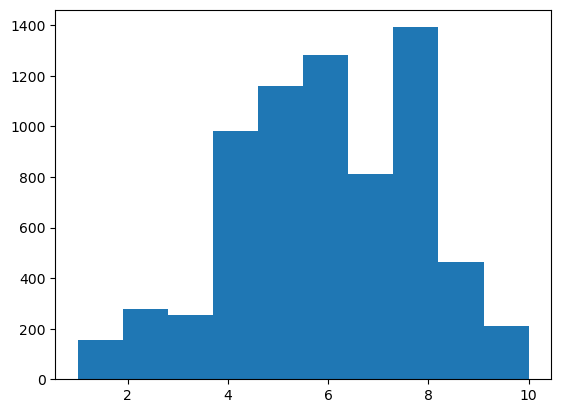

In [213]:
plt.hist(data["Pay_Scale"],bins=10)
plt.show()

(array([2042.,    0., 1615.,    0.,    0., 2023.,    0., 1197.,    0.,
         112.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

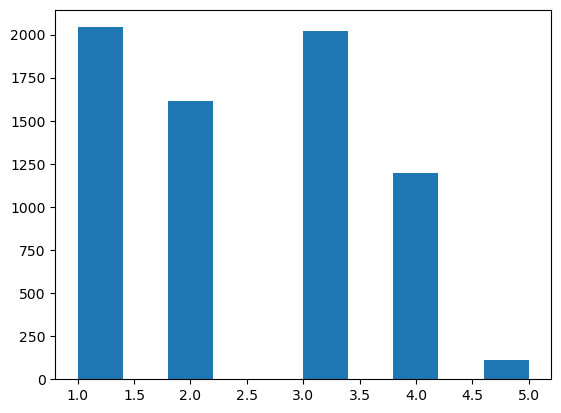

In [214]:
plt.hist(data["Work_Life_balance"],bins=10)

In [215]:
data["Pay_Scale"]=data["Pay_Scale"].fillna(np.round(data["Pay_Scale"].mean()))
data["Work_Life_balance"]=data["Work_Life_balance"].fillna(np.round(data["Work_Life_balance"].mode()[0]))

In [216]:
columns_with_null = data.columns[data.isna().any()].tolist()
columns_with_null

['Age', 'Time_of_service', 'VAR2', 'VAR4']

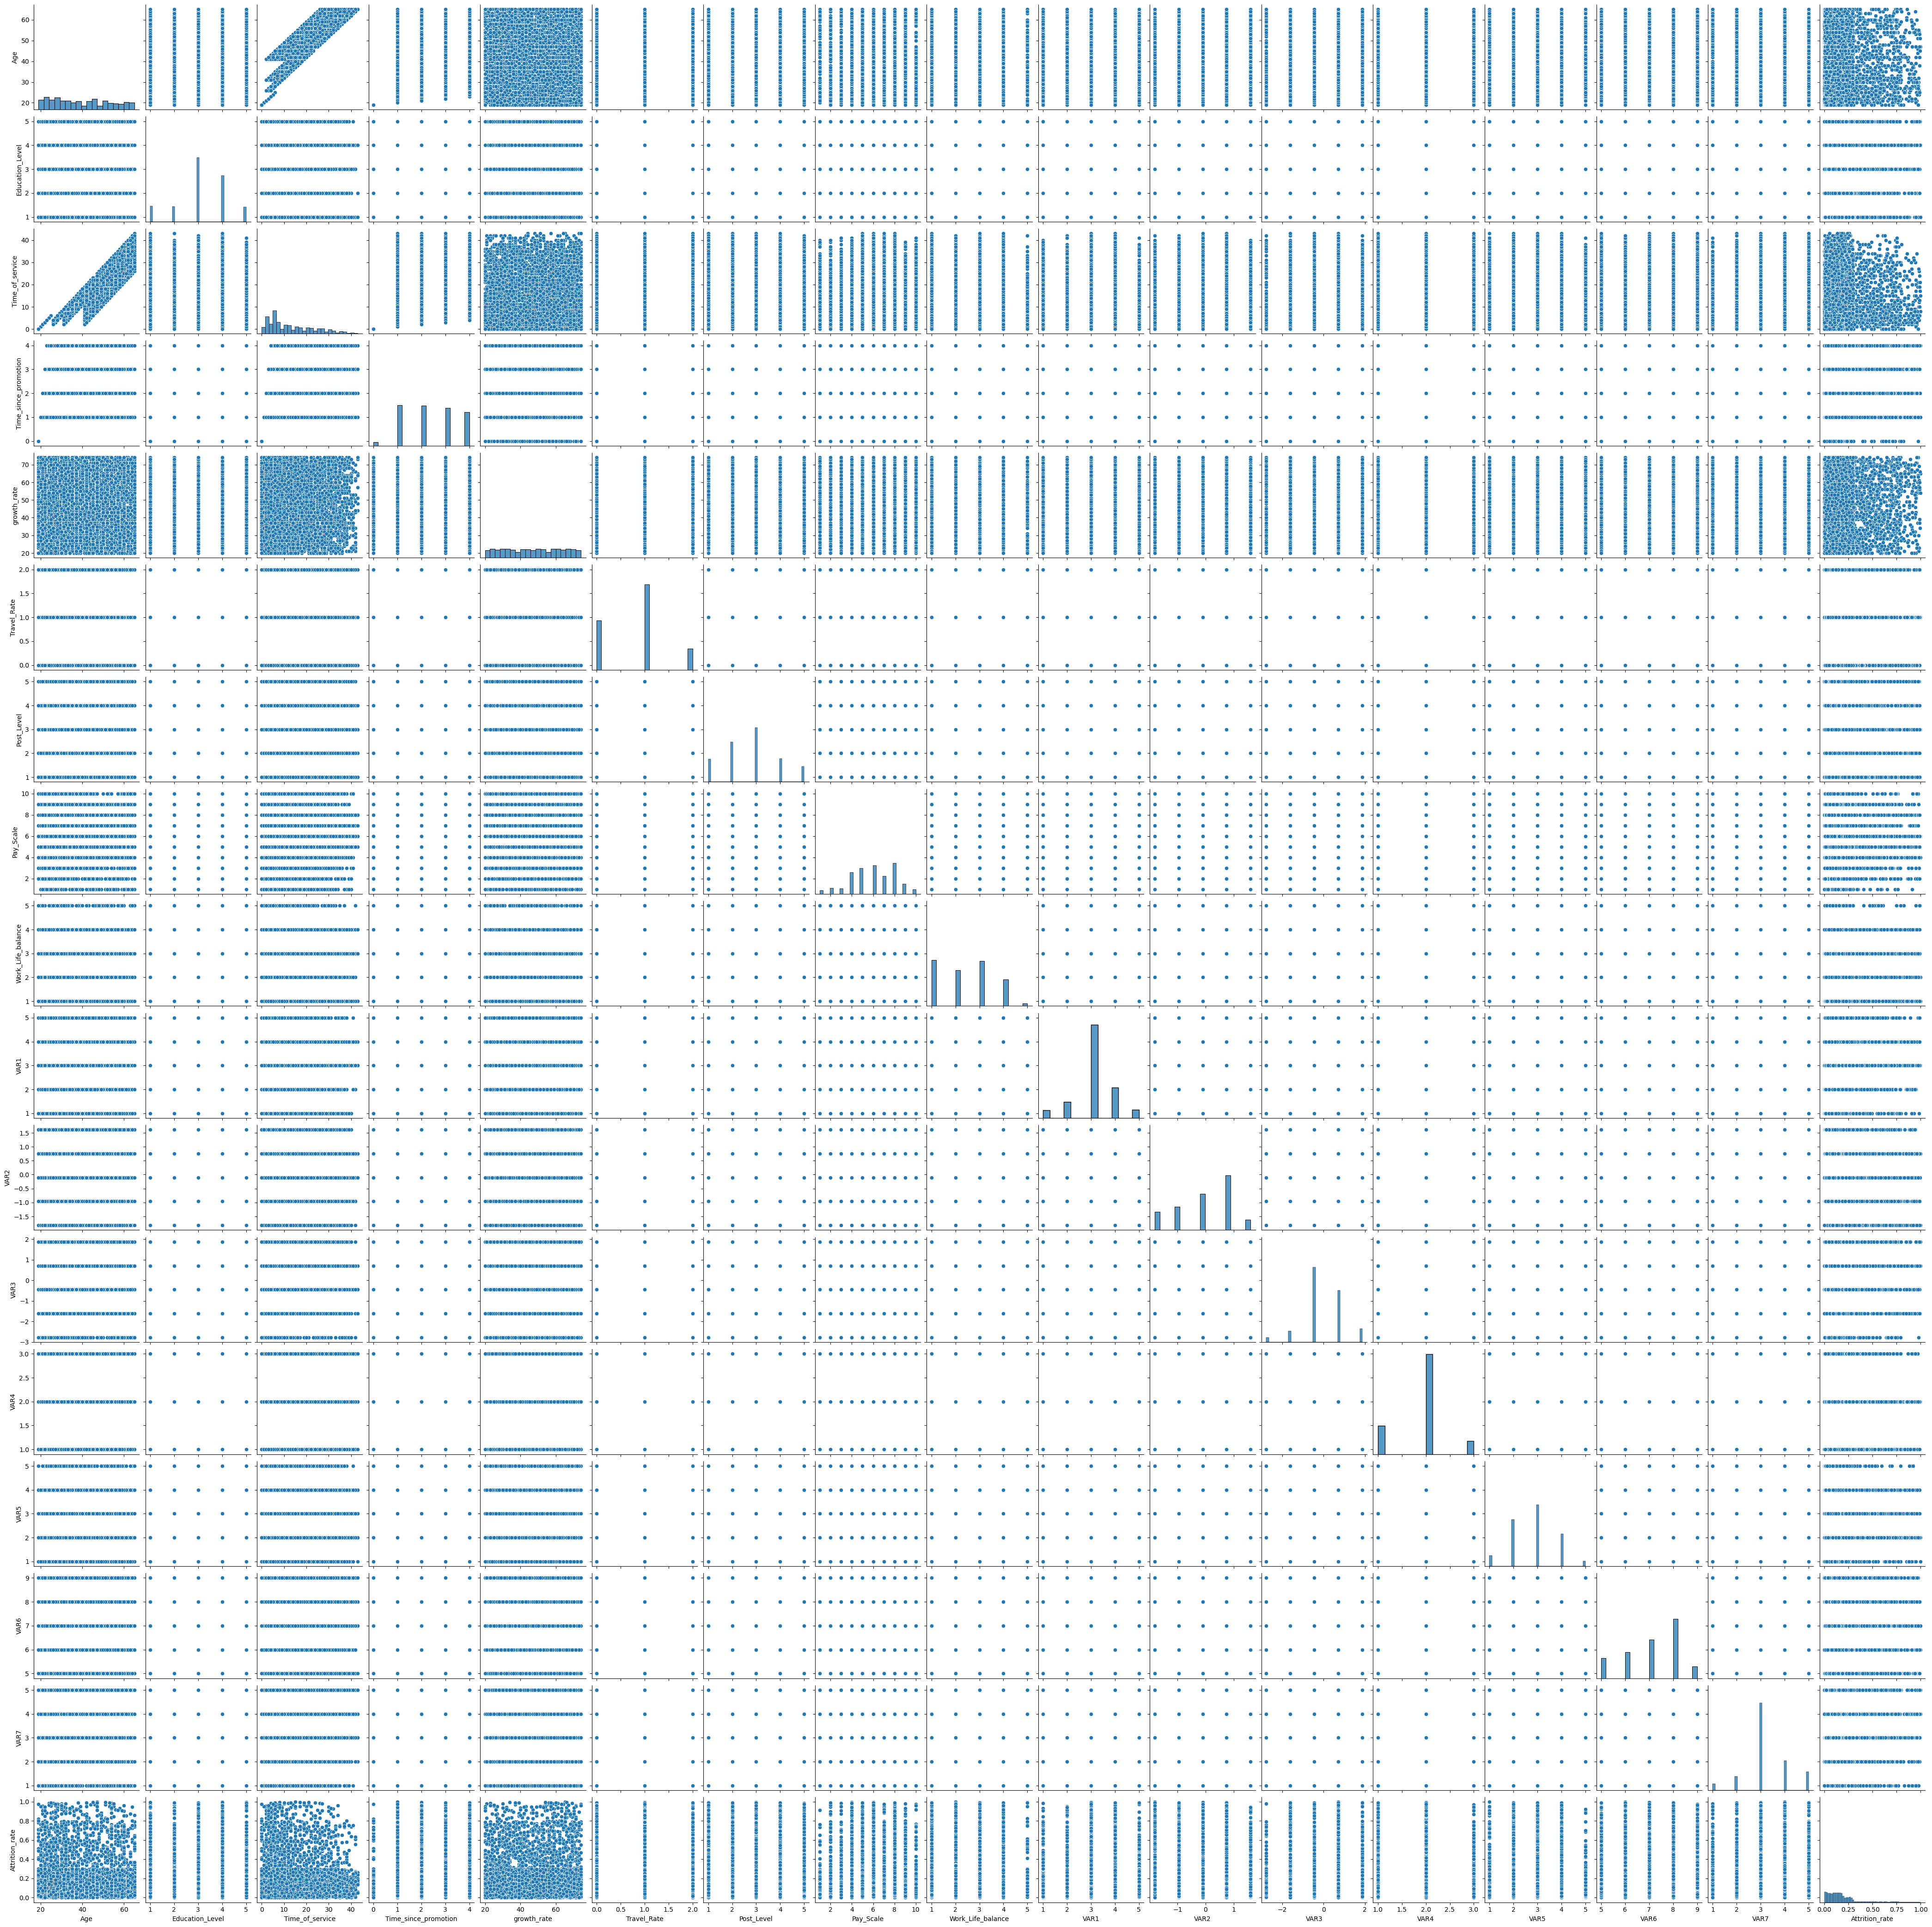

In [217]:
sns.pairplot(data)
plt.show()

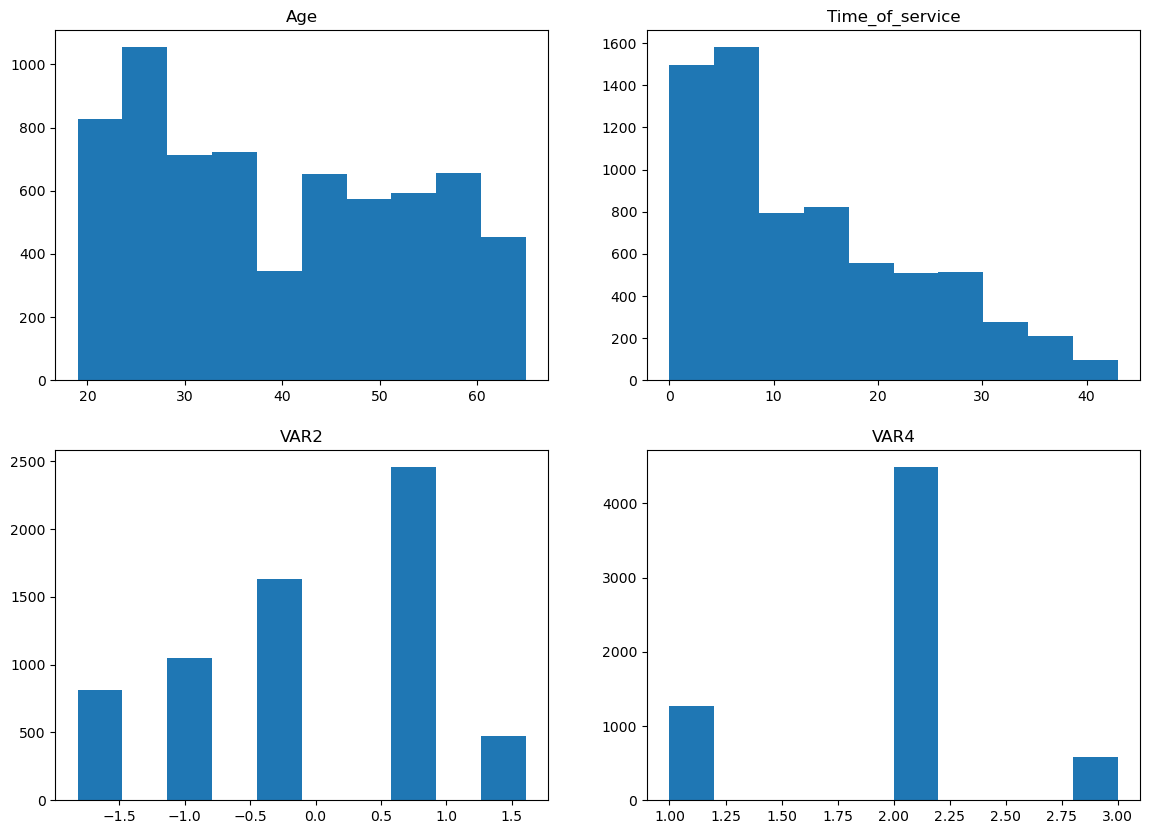

In [218]:
fig,axs=plt.subplots(2,2,figsize=(14,10))
count=0
for i in range(2):
    for j in range(2):
        axs[i,j].hist(data[columns_with_null[count]])
        axs[i,j].set_title(columns_with_null[count])
        count+=1

In [219]:
obj_cols=data.dtypes[data.dtypes=='object'].index.to_list()
for i in obj_cols:
    print(i,len(data[i].unique()))

Gender 2
Relationship_Status 2
Hometown 5
Unit 12
Decision_skill_possess 4
Compensation_and_Benefits 5


In [220]:
obj_data=data.dtypes[data.dtypes=="object"].index.to_list()
for i in obj_data:
    data[i]=LabelEncoder().fit_transform(data[i])

In [221]:
columns_with_null = data.columns[data.isna().any()].tolist()
columns_with_null

['Age', 'Time_of_service', 'VAR2', 'VAR4']

In [222]:
data.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      0
Compensation_and_Benefits      0
Work_Life_balance              0
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [223]:
linear=["Age","Time_of_service"]
corr=data.corr()

In [224]:
for target in linear:
    feature_corr=corr[target]
    feature_corr=feature_corr.sort_values(ascending=False)
    featured_cols=feature_corr[0:5].index.to_list()
    featured_data=data[featured_cols][~data[target].isnull()]
    featured_data=featured_data.dropna()
    X=featured_data.drop(columns=[target],axis=1)
    y=featured_data[target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    le=LinearRegression()
    le.fit(X_train,y_train) 
    y_pred=le.predict(X_test)
    condition = data[target].isnull() & data.drop(columns=target).notnull().all(axis=1)
    subset = data[condition]
    featured_cols.remove(target)
    print(featured_cols)

['Time_of_service', 'Time_since_promotion', 'Decision_skill_possess', 'Pay_Scale']
['Age', 'Time_since_promotion', 'Decision_skill_possess', 'Pay_Scale']


In [225]:
imputer = KNNImputer(n_neighbors=3)
data[['VAR2']] = imputer.fit_transform(data[['VAR2']])
data[['VAR4']] = imputer.fit_transform(data[['VAR4']])

In [226]:
data=data.dropna()

In [227]:
data["Gender"].unique()

array([0, 1])

In [228]:
le=LabelEncoder()
data["Hometown"]=le.fit_transform(data["Hometown"])
data["Decision_skill_possess"]=le.fit_transform(data["Decision_skill_possess"])
data["Compensation_and_Benefits"]=le.fit_transform(data["Compensation_and_Benefits"])

In [229]:
# used Frequency Encoding for the column Unit
p=data["Unit"].value_counts().to_dict()
data["Unit"]=data["Unit"].map(p)

In [230]:
data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,1,1287,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,1,24.0,3,1,3,1071,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,0,58.0,3,0,0,179,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,0,26.0,3,1,2,316,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668
4,0,31.0,1,0,3,1071,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


In [231]:
data.corr()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Gender,1.000000,0.004020,-0.006494,0.009333,-0.027353,0.037119,-0.003074,0.007968,-0.019992,-0.015525,...,0.010840,-0.000496,-0.004032,0.004746,0.000828,-0.001381,0.011304,0.010031,-0.002146,0.024870
Age,0.004020,1.000000,-0.004544,-0.002891,-0.014373,0.013099,0.024208,0.918853,0.149007,0.002448,...,-0.011542,0.000812,0.004922,0.005459,0.008525,-0.001151,0.004281,-0.000864,0.010076,-0.013706
Education_Level,-0.006494,-0.004544,1.000000,0.003909,-0.005691,-0.028211,-0.018803,-0.008681,-0.008664,-0.000691,...,0.005229,-0.017039,-0.005420,-0.012034,-0.011784,0.007120,0.005022,0.012370,0.009733,-0.004150
Relationship_Status,0.009333,-0.002891,0.003909,1.000000,-0.004256,-0.015369,0.003258,0.001867,-0.004553,0.010619,...,0.024818,-0.013154,0.005399,-0.022928,0.004256,0.024289,-0.010453,-0.002930,0.019261,0.013186
Hometown,-0.027353,-0.014373,-0.005691,-0.004256,1.000000,-0.000199,-0.006099,-0.016992,0.013673,0.012056,...,0.017891,-0.013806,-0.005975,-0.001005,0.015104,-0.012631,0.001966,-0.004033,0.002757,0.008469
Unit,0.037119,0.013099,-0.028211,-0.015369,-0.000199,1.000000,0.012213,0.011514,0.000590,-0.022935,...,-0.018615,0.017021,-0.015516,0.010553,-0.004794,-0.009364,0.011021,-0.013725,0.004878,-0.020923
Decision_skill_possess,-0.003074,0.024208,-0.018803,0.003258,-0.006099,0.012213,1.000000,0.026112,0.006712,0.011644,...,-0.004178,0.001932,0.007046,-0.002956,-0.002167,-0.008863,0.022086,-0.021274,0.005733,0.016686
Time_of_service,0.007968,0.918853,-0.008681,0.001867,-0.016992,0.011514,0.026112,1.000000,0.133492,-0.001106,...,-0.011181,-0.004996,0.000125,0.006028,0.008463,-0.006337,0.008591,0.005005,0.011446,-0.019306
Time_since_promotion,-0.019992,0.149007,-0.008664,-0.004553,0.013673,0.000590,0.006712,0.133492,1.000000,0.016255,...,0.005328,-0.011345,-0.004775,0.008443,0.002155,0.000018,0.006311,0.013384,0.005620,0.013079
growth_rate,-0.015525,0.002448,-0.000691,0.010619,0.012056,-0.022935,0.011644,-0.001106,0.016255,1.000000,...,-0.004164,-0.015210,-0.002338,0.010895,0.009965,0.016777,-0.018019,-0.007036,-0.021586,0.005473


In [232]:
data=data.drop(columns=["Gender","Relationship_Status"],axis=1)

In [233]:
data.corr()

,Age,Education_Level,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.004544,-0.014373,0.013099,0.024208,0.918853,0.149007,0.002448,0.008282,0.002117,...,-0.011542,0.000812,0.004922,0.005459,0.008525,-0.001151,0.004281,-0.000864,0.010076,-0.013706
Education_Level,-0.004544,1.000000,-0.005691,-0.028211,-0.018803,-0.008681,-0.008664,-0.000691,-0.017476,0.014583,...,0.005229,-0.017039,-0.005420,-0.012034,-0.011784,0.007120,0.005022,0.012370,0.009733,-0.004150
Hometown,-0.014373,-0.005691,1.000000,-0.000199,-0.006099,-0.016992,0.013673,0.012056,-0.012434,0.006918,...,0.017891,-0.013806,-0.005975,-0.001005,0.015104,-0.012631,0.001966,-0.004033,0.002757,0.008469
Unit,0.013099,-0.028211,-0.000199,1.000000,0.012213,0.011514,0.000590,-0.022935,0.013057,-0.001273,...,-0.018615,0.017021,-0.015516,0.010553,-0.004794,-0.009364,0.011021,-0.013725,0.004878,-0.020923
Decision_skill_possess,0.024208,-0.018803,-0.006099,0.012213,1.000000,0.026112,0.006712,0.011644,-0.002237,-0.007576,...,-0.004178,0.001932,0.007046,-0.002956,-0.002167,-0.008863,0.022086,-0.021274,0.005733,0.016686
Time_of_service,0.918853,-0.008681,-0.016992,0.011514,0.026112,1.000000,0.133492,-0.001106,0.005739,0.001888,...,-0.011181,-0.004996,0.000125,0.006028,0.008463,-0.006337,0.008591,0.005005,0.011446,-0.019306
Time_since_promotion,0.149007,-0.008664,0.013673,0.000590,0.006712,0.133492,1.000000,0.016255,-0.014016,-0.011965,...,0.005328,-0.011345,-0.004775,0.008443,0.002155,0.000018,0.006311,0.013384,0.005620,0.013079
growth_rate,0.002448,-0.000691,0.012056,-0.022935,0.011644,-0.001106,0.016255,1.000000,0.009078,-0.009300,...,-0.004164,-0.015210,-0.002338,0.010895,0.009965,0.016777,-0.018019,-0.007036,-0.021586,0.005473
Travel_Rate,0.008282,-0.017476,-0.012434,0.013057,-0.002237,0.005739,-0.014016,0.009078,1.000000,0.020192,...,-0.007251,0.002580,0.021296,0.017156,-0.010161,-0.002338,-0.003287,-0.016951,-0.002767,-0.010598
Post_Level,0.002117,0.014583,0.006918,-0.001273,-0.007576,0.001888,-0.011965,-0.009300,0.020192,1.000000,...,0.012046,-0.014703,-0.005347,-0.007894,0.014904,-0.014999,0.013590,0.000905,-0.009966,0.016959


In [234]:
data['Attrition_rate'] = data['Attrition_rate'].apply(lambda x: True if x > 0.5 else False)

In [235]:
X=data.drop(columns=["Attrition_rate"],axis=1)
y=data["Attrition_rate"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [236]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [237]:
model=LogisticRegression(solver= 'newton-cg', multi_class = 'multinomial')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy of the model ",np.round(accuracy_score(y_test,y_pred),3))

Accuracy of the model  0.701


In [238]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[871, 311],
       [ 75,  34]])

In [239]:
y_prob=model.predict_proba(X_test)

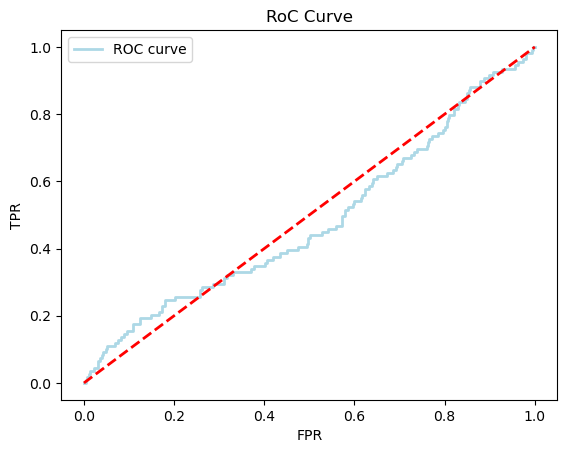

In [240]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,0], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RoC Curve')
plt.legend()